In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd

## What We can Learn from the Following / Reasoning behind it all: Logistic Regression

Step one was cleaning the data; getting a binary AQI value for our training data, using logistic regression here to begin. Dropping all of the values that play into total AQI as well as categorical data such as state, county, and city. Looking at exclusively different race percentages and household income. 

When we tested for feature importance in Logistic Regression, Household income had the biggest impact. This means we should be looking at household income as it relates to urban pollution, as well as the next most important factors which were state code, county code, total population, percent male, percent female, and then percentages of white alone. 

Going to continue by looking at what happens with different models. 

In [12]:
#place holder until we get dataset ready

data = pd.read_csv("pollution_income_race.csv")

data["AQI Binary"] = 1 * (data["AQI Total"] <= 100)

#our labels are the AQI Binary for now
y = data.loc[:,"AQI Binary"]

#also going to drop states and cities for now, (and city) because we don't get a numerical from that
data = data.drop(columns=["State_x", 
                          "County_x", 
                          "City", "State_y", 
                          "County_y", 
                          "AQI Total", 
                          "AQI Binary"])

#finally, drop those features that directly contribute to AQI (i.e. NO2 Mean, NO2 1st Max Value)
data = data.drop(columns=["NO2 Mean",
                         "NO2 1st Max Value",
                         "NO2 1st Max Hour",
                         "NO2 AQI",
                         "O3 Mean",
                         "O3 1st Max Value",
                         "O3 1st Max Hour",
                         "O3 AQI",
                         "SO2 Mean",
                         "SO2 1st Max Value",
                         "SO2 1st Max Hour",
                         "SO2 AQI",
                         "CO Mean",
                         "CO 1st Max Value",
                         "CO 1st Max Hour",
                         "CO AQI"])

#train and test data
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

In [4]:
#feature importance
X_train

,State Code,County Code,Date Local,Median Household Income,Total Pop,Total Male %,Total Female %,White Alone (M) %,White Alone (F) %,Black Alone (M) %,Black Alone (F) %,Am Indian+AK Native Alone (M) %,Am Indian+AK Native Alone (F) %,Asian Alone (M) %,Asian Alone (F) %,Nat. HI and PI (M) %,Nat. HI and PI (F) %,TOM_MALE
672,20,107,2003,55006.0,57840,0.512172,0.487828,0.488589,0.465733,0.005602,0.003492,0.004080,0.004011,0.001383,0.002490,0.000104,0.000173,0.012414
1070,42,11,2002,70057.0,2573770,0.496091,0.503909,0.427123,0.437294,0.039629,0.037528,0.004895,0.004756,0.007500,0.008674,0.001086,0.001086,0.015858
1244,45,19,2007,72451.0,2461354,0.485515,0.514485,0.346330,0.355457,0.118822,0.137157,0.002137,0.002001,0.008919,0.010407,0.000466,0.000468,0.008841
1195,42,125,2001,65808.0,1255952,0.495157,0.504843,0.460263,0.471629,0.017951,0.015601,0.001021,0.000842,0.005774,0.006241,0.000129,0.000161,0.010019
771,24,33,2013,85246.0,5776216,0.483142,0.516858,0.141690,0.129156,0.298892,0.343182,0.006765,0.006064,0.021272,0.022735,0.001156,0.001103,0.013367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,42,17,2011,92441.0,3877288,0.494667,0.505333,0.433937,0.442409,0.022901,0.023377,0.001580,0.001407,0.026174,0.028250,0.000328,0.000372,0.009748
1130,42,49,2016,55181.0,1620628,0.497382,0.502618,0.430373,0.439812,0.041937,0.037242,0.001525,0.001380,0.010380,0.010344,0.000284,0.000420,0.012884
1294,48,141,2007,48522.0,5199394,0.497475,0.502525,0.451999,0.463569,0.023895,0.017510,0.005685,0.005279,0.006777,0.007391,0.001190,0.001112,0.007929
860,34,7,2003,71718.0,3140920,0.485369,0.514631,0.336421,0.348684,0.102185,0.116036,0.003474,0.003493,0.029252,0.031900,0.000579,0.000583,0.013459


In [5]:
y_train

#making y_train into categorical (good, bad) for now. 1 is good, 0 is worst
#using threshold from epa.gov: 100 and below gets 1, 101 and above gets 0


672     1
1070    0
1244    1
1195    0
771     1
       ..
1095    1
1130    1
1294    1
860     0
1126    1
Name: AQI Binary, Length: 943, dtype: int64

In [6]:
X_train.columns.values.tolist()

['State Code',
 'County Code',
 'Date Local',
 'Median Household Income',
 'Total Pop',
 'Total Male %',
 'Total Female %',
 'White Alone (M) %',
 'White Alone (F) %',
 'Black Alone (M) %',
 'Black Alone (F) %',
 'Am Indian+AK Native Alone (M) %',
 'Am Indian+AK Native Alone (F) %',
 'Asian Alone (M) %',
 'Asian Alone (F) %',
 'Nat. HI and PI (M) %',
 'Nat. HI and PI (F) %',
 'TOM_MALE']

In [7]:
data.dtypes

State Code                           int64
County Code                          int64
Date Local                           int64
Median Household Income            float64
Total Pop                            int64
Total Male %                       float64
Total Female %                     float64
White Alone (M) %                  float64
White Alone (F) %                  float64
Black Alone (M) %                  float64
Black Alone (F) %                  float64
Am Indian+AK Native Alone (M) %    float64
Am Indian+AK Native Alone (F) %    float64
Asian Alone (M) %                  float64
Asian Alone (F) %                  float64
Nat. HI and PI (M) %               float64
Nat. HI and PI (F) %               float64
TOM_MALE                           float64
dtype: object

<BarContainer object of 5 artists>

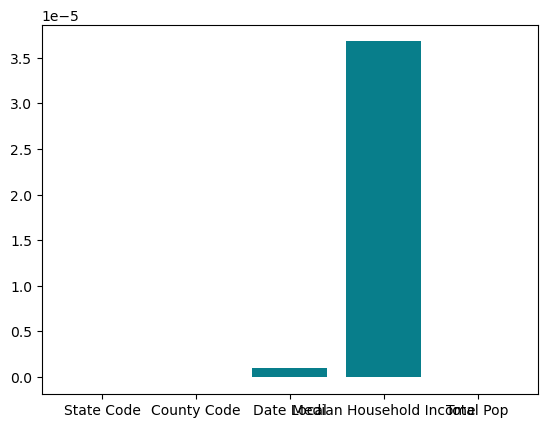

In [8]:
#try feature importance w Logistic Regression
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

LR = LogisticRegression()
LR.fit(X_train, y_train)

#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[0:5]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 5 artists>

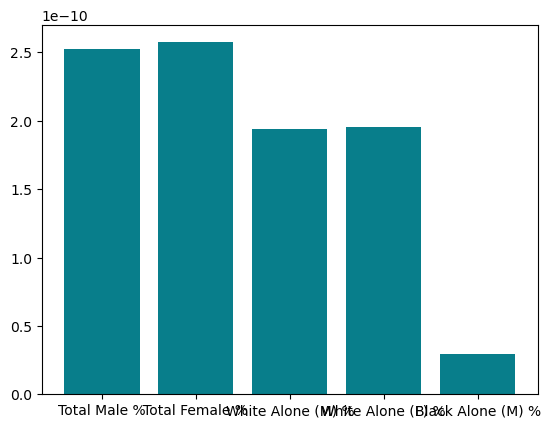

In [9]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[5:10]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 4 artists>

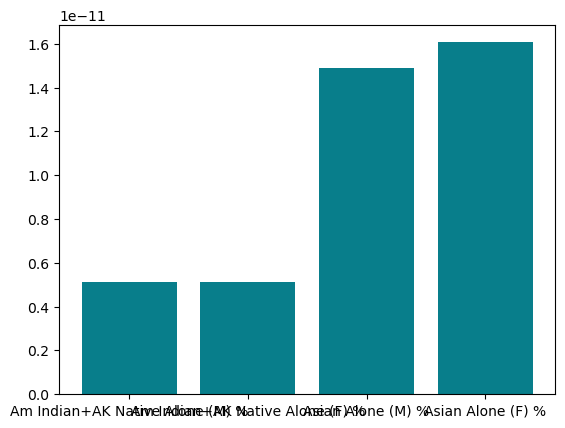

In [10]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[11:15]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')

<BarContainer object of 3 artists>

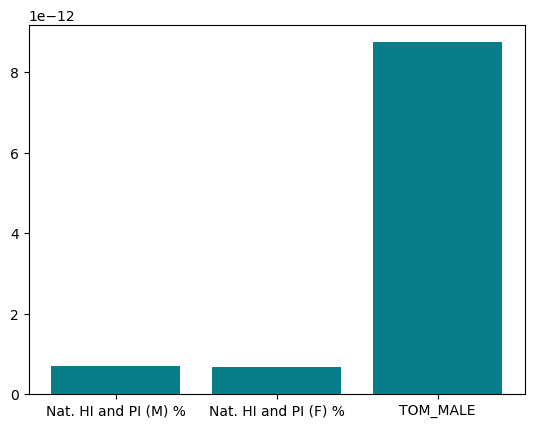

In [11]:
#get importance
importances = pd.DataFrame(data = 
                           {'Attribute': X_train.columns,
                            'Importance': LR.coef_[0]
                           })

importances.sort_values('Importance')

importances = importances[15:20]

#plot importance for features
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')